### Microbiome landscape refers to sample similarities on two-dimensional projection.

### For two-dimensional landscape, it's the same as 'Ordination Analysis'.

#### Prepare

In [ ]:
# Import packages
library("microbiome")
library("phyloseq")
library("ggplot2")

In [2]:
# Import data
data(dietswap)
pseq <- dietswap

# Convert to compositional data
pseq.rel <- microbiome::transform(pseq, "compositional")

# Pick core taxa
pseq.core <- core(pseq.rel, detection = 5/100, prevalence = 5/100)
pseq.core <- subset_samples(pseq.core, sex == "female" &
                                   bmi_group == "overweight")

head(otu_table(pseq.core))
head(sample_data(pseq.core))
head(tax_table(pseq.core))

,Sample-5,Sample-13,Sample-21,Sample-29,Sample-32,Sample-33,Sample-37,Sample-41,Sample-42,Sample-46,⋯,Sample-145,Sample-149,Sample-158,Sample-165,Sample-172,Sample-176,Sample-180,Sample-186,Sample-210,Sample-218
Allistipes et rel.,0.002824207,0.001197461,0.005284614,0.004643963,0.069626830,0.01365774,0.026031746,0.073542835,0.01138634,0.006875030,⋯,0.018343195,0.052472821,0.02154718,0.007640514,0.04037666,0.06856931,0.046935457,0.05586943,0.001904122,0.009522082
Bacteroides fragilis et rel.,0.001902017,0.001017842,0.002566813,0.002373581,0.023901748,0.02209120,0.009664903,0.025557439,0.04574511,0.013457506,⋯,0.027692308,0.004084711,0.03597786,0.007162982,0.05564275,0.11502347,0.036953962,0.11372672,0.001456093,0.005803936
Bacteroides vulgatus et rel.,0.009625360,0.001257334,0.005058131,0.006501548,0.229475673,0.26121352,0.168042328,0.159733994,0.23951258,0.102052757,⋯,0.494319527,0.098095896,0.07623880,0.061792656,0.24111856,0.09982703,0.098300903,0.38418079,0.008232527,0.008796590
Clostridium cellulosi et rel.,0.041959654,0.201173512,0.051562736,0.057069143,0.002172886,0.20329875,0.272451499,0.004955014,0.16679984,0.018089619,⋯,0.052899408,0.154213536,0.02635741,0.030418796,0.01883293,0.01494935,0.003981383,0.00428960,0.005320341,0.066110456
Clostridium orbiscindens et rel.,0.015273775,0.015507125,0.101842066,0.065428277,0.017477563,0.03948056,0.024126984,0.020211240,0.01358370,0.007557658,⋯,0.008047337,0.010306039,0.05633896,0.029033953,0.02882009,0.02940450,0.078113610,0.01349655,0.003416219,0.036546658
Clostridium symbiosum et rel.,0.008933718,0.024308466,0.013589008,0.007327141,0.040529051,0.02582282,0.020388007,0.017472943,0.01498202,0.008386562,⋯,0.009230769,0.006912587,0.10279389,0.099040160,0.04679698,0.07499382,0.148993439,0.05586943,0.003472222,0.008977963


,subject,sex,nationality,group,sample,timepoint,timepoint.within.group,bmi_group
,<fct>,<fct>,<fct>,<fct>,<chr>,<int>,<int>,<fct>
Sample-5,qjy,female,AFR,HE,Sample-5,2,1,overweight
Sample-13,qjy,female,AFR,HE,Sample-13,3,2,overweight
Sample-21,qjy,female,AFR,DI,Sample-21,4,1,overweight
Sample-29,qjy,female,AFR,DI,Sample-29,5,2,overweight
Sample-32,azh,female,AAM,ED,Sample-32,1,1,overweight
Sample-33,lox,female,AAM,ED,Sample-33,1,1,overweight


,Phylum,Family,Genus
Allistipes et rel.,Bacteroidetes,Bacteroidetes,Allistipes et rel.
Bacteroides fragilis et rel.,Bacteroidetes,Bacteroidetes,Bacteroides fragilis et rel.
Bacteroides vulgatus et rel.,Bacteroidetes,Bacteroidetes,Bacteroides vulgatus et rel.
Clostridium cellulosi et rel.,Firmicutes,Clostridium cluster IV,Clostridium cellulosi et rel.
Clostridium orbiscindens et rel.,Firmicutes,Clostridium cluster IV,Clostridium orbiscindens et rel.
Clostridium symbiosum et rel.,Firmicutes,Clostridium cluster XIVa,Clostridium symbiosum et rel.


#### Landscape

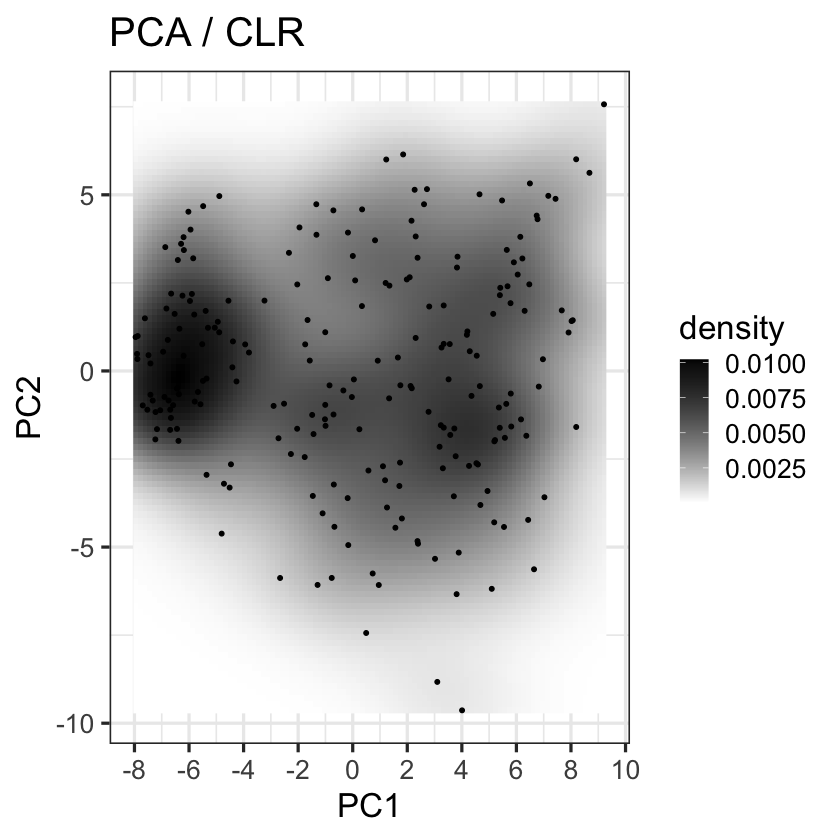

In [2]:
# PCA with euclidean distance and CLR transformation
p <- plot_landscape(pseq, method = "PCA", transformation = "clr") +
     labs(title = paste("PCA / CLR"))

print(p)

Warning message:
“Position guide is perpendicular to the intended axis. Did you mean to specify a different guide `position`?”


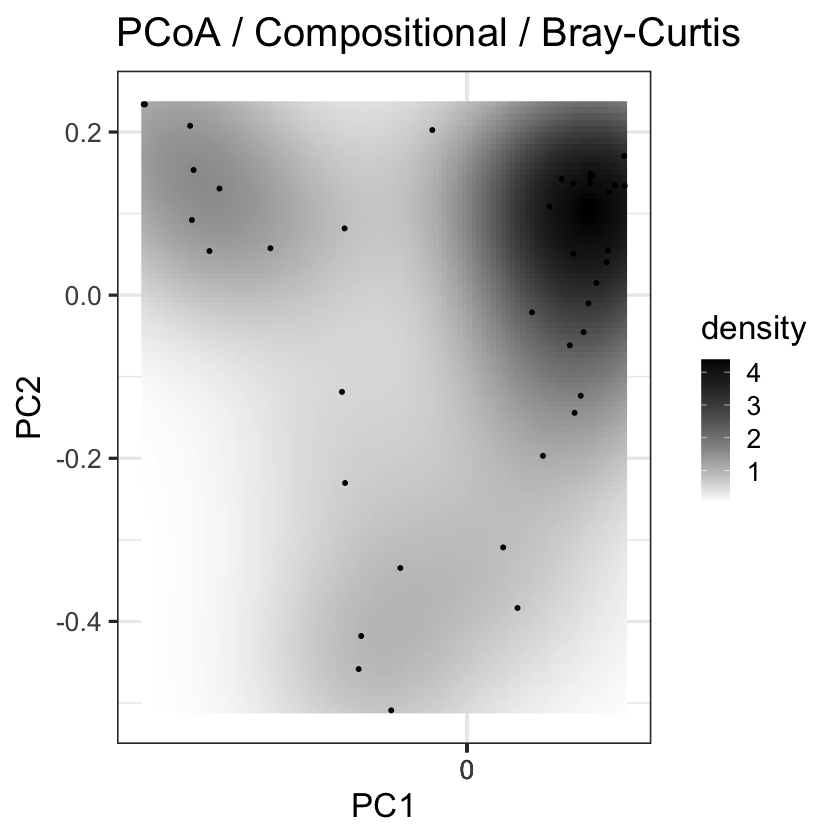

In [3]:
# PCoA for compositional data with Bray-Curtis distances
p <- plot_landscape(microbiome::transform(pseq.core, "compositional"),
                      method = "PCoA", distance = "bray") +
     labs(title = paste("PCoA / Compositional / Bray-Curtis"))

print(p)

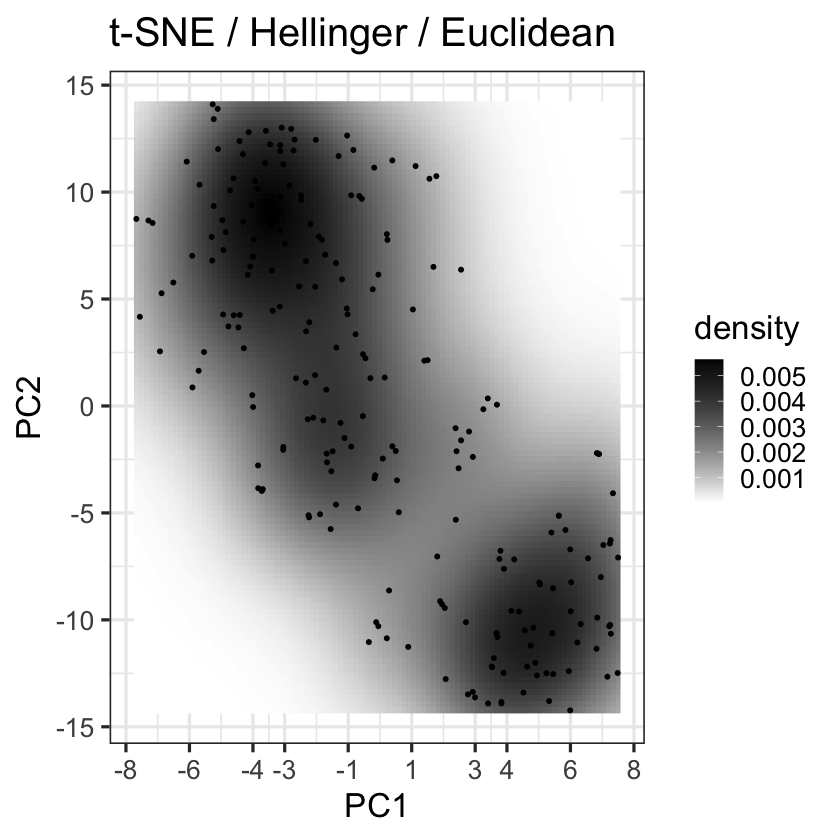

In [4]:
# t-SNE with euclidean distance and hellinger transformation
p <- plot_landscape(pseq, "t-SNE",
     distance = "euclidean", transformation = "hellinger") +
     labs(title = paste("t-SNE / Hellinger / Euclidean"))       

print(p)

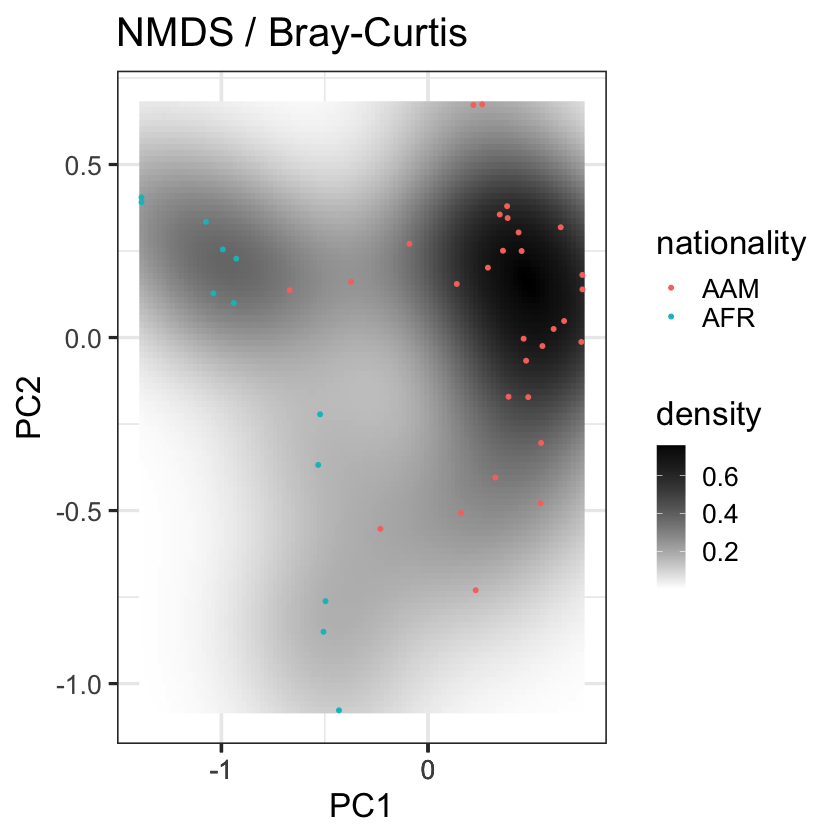

In [10]:
# Landscape plot directly from phyloseq object
p <- plot_landscape(pseq.core, "NMDS", "bray", col = "nationality") +
     labs(title = paste("NMDS / Bray-Curtis"))    

print(p)

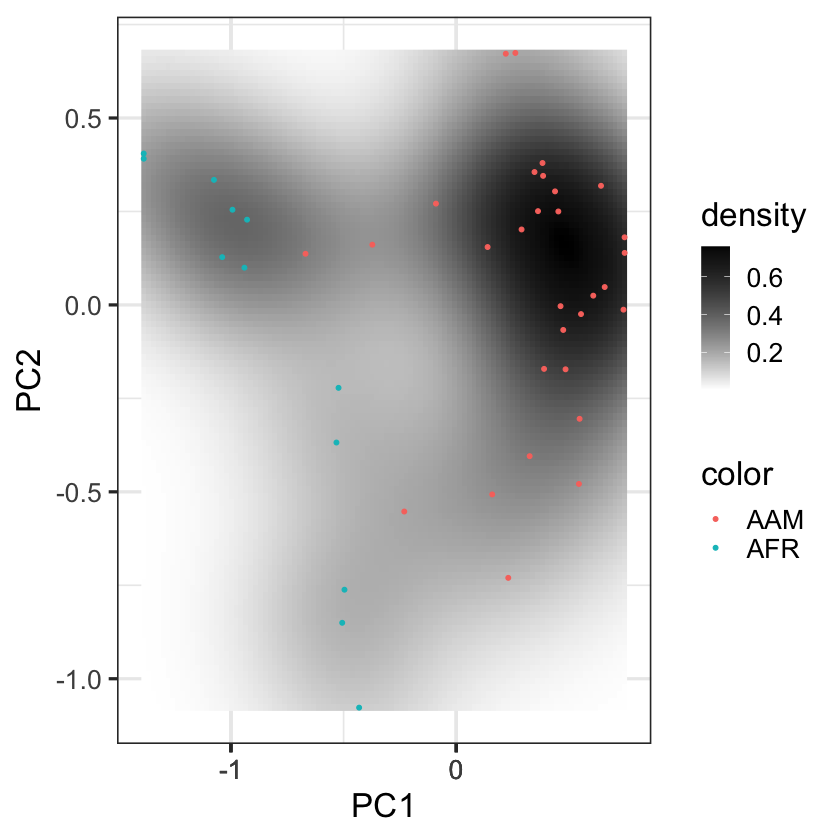

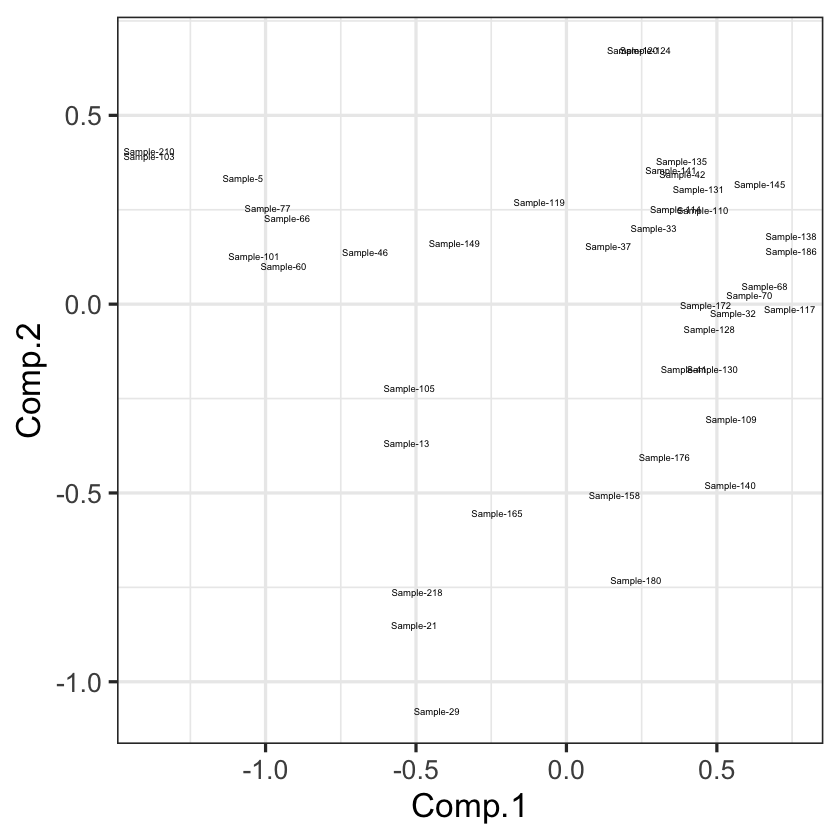

In [8]:
# For direct access to the ordination coordinates, use the following
set.seed(423542)
x <- pseq.core
quiet(x.ord <- ordinate(x, "NMDS", "bray"))
# Pick the projected data (first two columns + metadata)
proj <- phyloseq::plot_ordination(x, x.ord, justDF=TRUE)
# Rename the projection axes
names(proj)[1:2] <- paste("NMDS", 1:2, sep = ".")

# Same with a generic data.frame
# (note that random seed will affect the exact ordination)
p <- plot_landscape(proj[, 1:2], col = proj$nationality, legend = T)
print(p)

# Visualize sample names
ax1 <- names(proj)[[1]]
ax2 <- names(proj)[[2]]
p <- ggplot(aes_string(x = ax1, y = ax2, label = "sample"), data = proj) +
       geom_text(size = 2)
print(p)

#### Abundance histograms (one-dimensional landscape)

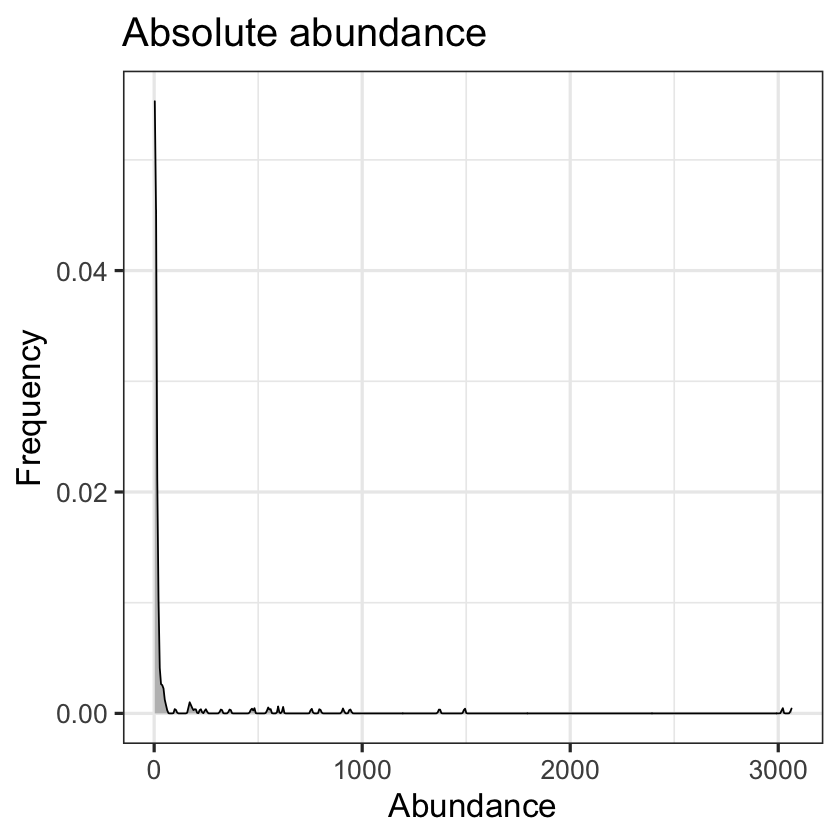

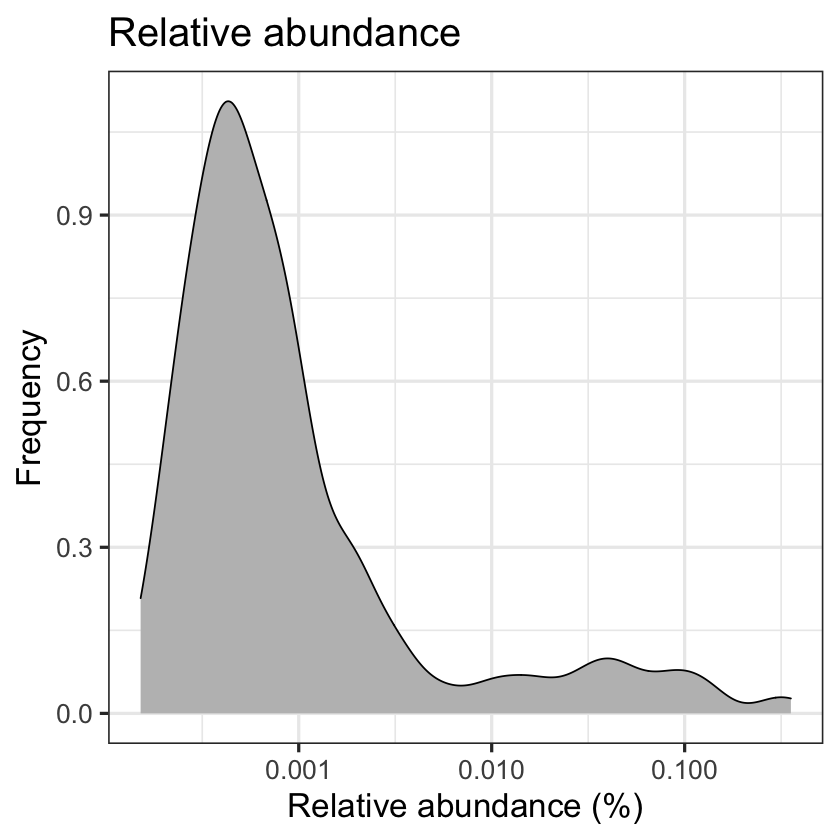

In [11]:
pseq <- dietswap

# Visualize population densities for specific taxa
plot_density(pseq, "Dialister") + ggtitle("Absolute abundance")

# Same with log10 compositional abundances
x <- microbiome::transform(pseq, "compositional")
tax <- "Dialister"
plot_density(x, tax, log10 = TRUE) +
  ggtitle("Relative abundance") +
  xlab("Relative abundance (%)")